In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

import plotly as py
import matplotlib.pyplot as plt


from tqdm import tqdm, trange
import seaborn as sns
import random
from sklearn import preprocessing


import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from pprint import pprint
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold


In [172]:
from sklearn.model_selection import cross_validate

Random Forest preparation/Implementation

In [105]:
#creating dummy variables for logistic regression 
df_dummies=pd.get_dummies(df_train_full['primary_use'])


In [29]:
df_dummies.head()

,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Services
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [106]:
df_full_2_rf=pd.concat([df_train_full,df_dummies], axis=1)

In [107]:
df_train2_rf = df_full_2_rf[df_full_2_rf['building_id']<1242]

In [108]:
df_val_rf = df_full_2_rf[df_full_2_rf['building_id']>=1242] #20% split (will need to change when I add more data)

In [109]:
df_train2_x_rf = df_train2_rf.drop(['anomaly','building_id', 'site_id','primary_use','weekday_hour','date','month','hour' ], axis=1)
df_val_x_rf = df_val_rf.drop(['anomaly','building_id', 'site_id','primary_use','weekday_hour','date','month','hour'], axis=1)

In [110]:


rf = RandomForestClassifier(n_estimators=100, random_state=123456)
rf.fit(df_train2_x_rf, df_train2_y)

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(random_state=123456)

In [111]:
predicted_rf= rf.predict(df_val_x_rf)
accuracy=(df_val_y, predicted_rf)

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [143]:
df_val_x_rf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 349651 entries, 160 to 1749493
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   meter_reading                  349651 non-null  float64
 1   square_feet                    349651 non-null  int64  
 2   year_built                     349651 non-null  int64  
 3   floor_count                    349651 non-null  int64  
 4   air_temperature                349651 non-null  float64
 5   cloud_coverage                 349651 non-null  int64  
 6   dew_temperature                349651 non-null  float64
 7   precip_depth_1_hr              349651 non-null  int64  
 8   sea_level_pressure             349651 non-null  float64
 9   wind_direction                 349651 non-null  int64  
 10  wind_speed                     349651 non-null  float64
 11  air_temperature_std_lag7       349651 non-null  float64
 12  air_temperature_std_lag73  

In [112]:
cm = metrics.confusion_matrix(df_val_y, predicted_rf)
print(cm)

[[339012    526]
 [  3003   7110]]


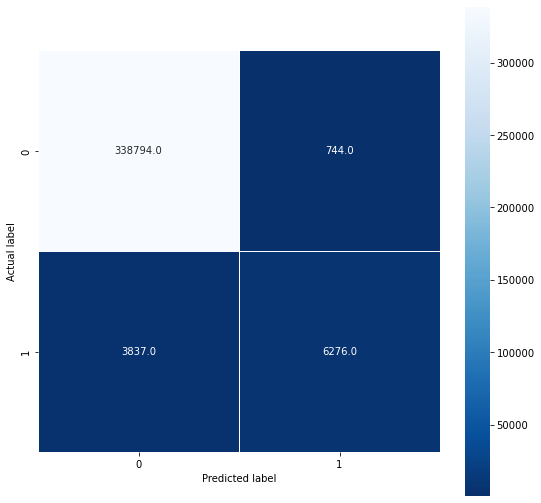

In [126]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.savefig("confusion matrix.png", facecolor='w')

In [457]:
df_val_y.value_counts()

0    339538
1     10113
Name: anomaly, dtype: int64

In [114]:
pd.DataFrame(data=[accuracy_score(df_val_y, predicted_rf), recall_score(df_val_y, predicted_rf),
                   precision_score(df_val_y, predicted_rf), roc_auc_score(df_val_y, predicted_rf),f1_score(df_val_y, predicted_rf)], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'F1_score'])

,0
accuracy,0.989907
recall,0.703055
precision,0.931116
roc_auc_score,0.850753
F1_score,0.801172


In [464]:
rf.feature_importances_

array([0.37068946, 0.07597605, 0.02420723, 0.01637973, 0.01986226,
       0.00624616, 0.02153791, 0.00763924, 0.0241816 , 0.01146404,
       0.00951371, 0.01629411, 0.02787771, 0.00960937, 0.00768738,
       0.03103251, 0.0308453 , 0.01764373, 0.01709602, 0.0023215 ,
       0.0308771 , 0.01067011, 0.00763676, 0.01852321, 0.02359672,
       0.03442558, 0.10831866, 0.01784682])

In [176]:
cv=results=cross_validate(rf, df_train2_x_rf, df_train2_y, cv=5, scoring=['accuracy','precision','recall','f1','roc_auc'])

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strin

In [191]:
results
#i need to figure out why such a difference between the CV and the holdout results. Also need to remember how to appripriately find averages from a dictionary

{'fit_time': array([222.84123588, 218.67769909, 214.17715192, 218.54078603,
        222.57882023]),
 'score_time': array([6.14333797, 6.23122692, 5.53082299, 5.42119884, 5.58518505]),
 'test_accuracy': array([0.99087042, 0.99053824, 0.98631634, 0.98948094, 0.9901203 ]),
 'test_precision': array([0.83538999, 0.89135317, 0.73194685, 0.93809356, 0.96161826]),
 'test_recall': array([0.65992275, 0.58396174, 0.46606585, 0.4906181 , 0.5115894 ]),
 'test_f1': array([0.73736128, 0.70563396, 0.56950219, 0.64428071, 0.66786744]),
 'test_roc_auc': array([0.87433053, 0.82290478, 0.83214597, 0.88198175, 0.84455218])}

In [197]:
sum([0.99087042, 0.99053824, 0.98631634, 0.98948094, 0.9901203 ])/5


0.9894652479999999

In [196]:
sum([0.83538999, 0.89135317, 0.73194685, 0.93809356, 0.96161826])/5

0.871680366

In [198]:
sum([0.65992275, 0.58396174, 0.46606585, 0.4906181 , 0.5115894])/5

0.542431568

In [199]:
sum([0.73736128, 0.70563396, 0.56950219, 0.64428071, 0.66786744])/5

0.664929116

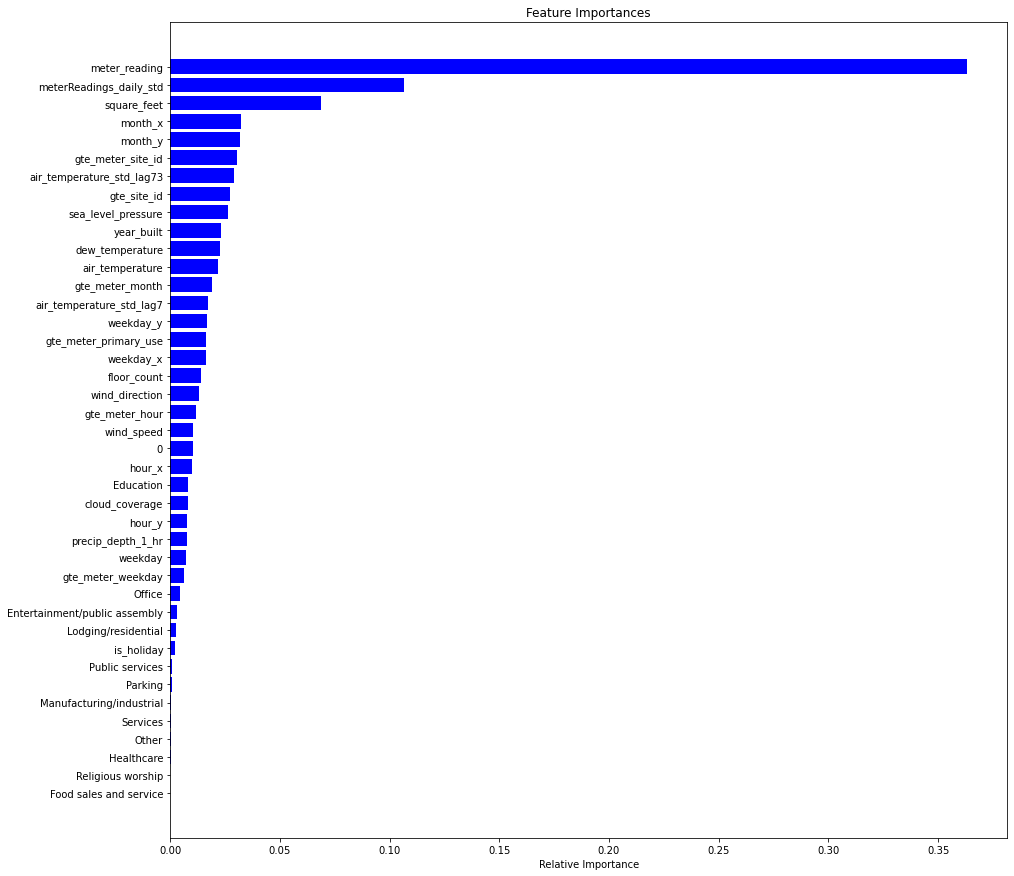

In [129]:

plt.figure(figsize=(15,15))
features = df_train2_x_rf.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig("feature_imp_rf.png", facecolor='w',bbox_inches='tight')

In [130]:
probs_rf=rf.predict_proba(df_val_x_rf)[:,1]

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [131]:
#https://python-bloggers.com/2020/12/roc-and-auc-how-to-evaluate-machine-learning-models-in-no-time/


auc_rf = roc_auc_score(df_val_y, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(df_val_y, probs_rf)

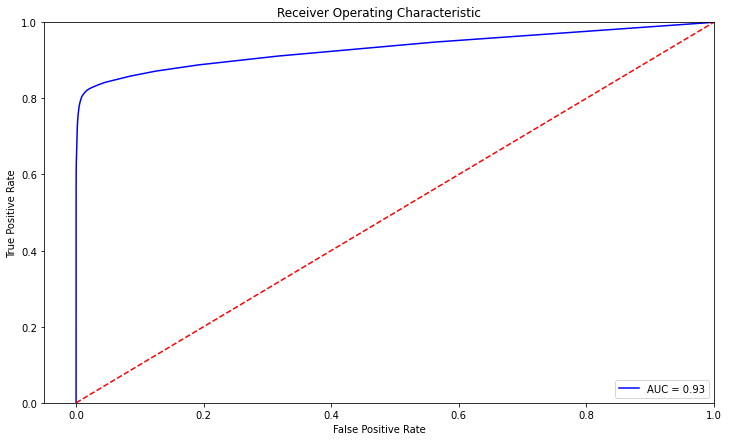

In [133]:
#https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

# calculate the fpr and tpr for all thresholds of the classification

#would like to learn more abot the ROC curve and appropriate way to report the AUC 
roc_auc = metrics.auc(fpr_rf, tpr_rf)

# method I: plt

plt.figure(figsize=(12, 7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_rf, tpr_rf, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('auc_roc.png', facecolor='w')

In [553]:
#didn't end up using this... 
#from: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [177]:
random_grid= {   'n_estimators': [200, 500],
    'max_depth' : [4,6,8],
    'min_samples_leaf' : [3, 4, 5],
    'max_features': ['sqrt']}

In [179]:
#this seemed to take too long)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 15, cv = 5, verbose=3, random_state=42)
# Fit the random search model
rf_random.fit(df_train2_x_rf, df_train2_y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KeyboardInterrupt: 

In [169]:
rf_random.best_params_

{'n_estimators': 500, 'min_samples_leaf': 4, 'max_depth': 4}

In [99]:
df_train2_x_rf_mini=df_train2_x_rf.iloc[:500000,:]

In [100]:
df_train2_y_mini=df_train2_y.iloc[:500000]
df_train2_y_mini.value_counts()

0    489966
1     10034
Name: anomaly, dtype: int64

In [98]:
#https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv/notebook
param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,5,6,7,8],
    'min_samples_leaf' : [3, 4, 5]
}

In [163]:
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=20, scoring='f1', n_jobs=4, cv=5, verbose=3, random_state=1001)

In [164]:
random_search_rf.fit(df_train2_x_rf.iloc[:,:42], df_train2_y)
#this took too long to run - need to find ways to optimize

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strin

[CV 4/5] END max_depth=7, min_samples_leaf=5, n_estimators=200;, score=nan total time=163.4min


/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_

[CV 2/5] END max_depth=7, min_samples_leaf=5, n_estimators=200;, score=nan total time=163.8min


/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_

[CV 1/5] END max_depth=7, min_samples_leaf=5, n_estimators=200;, score=nan total time=163.8min


/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_

[CV 3/5] END max_depth=7, min_samples_leaf=5, n_estimators=200;, score=nan total time=164.1min


/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


KeyboardInterrupt: 

Isolation Forest implementation

In [92]:
##https://machinelearningmastery.com/anomaly-detection-with-isolation-forest-and-kernel-density-estimation/
##https://medium.com/@corymaklin/
# 
# -forest-799fceacdda4
model=IsolationForest()
model.fit(df_train2_x_rf, df_train2_y)

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


IsolationForest()

In [93]:
predictions_IF=model.predict(df_val_x_rf)

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [94]:
predictions_IF[predictions_IF==1] = 0
predictions_IF[predictions_IF==-1] = 1

In [97]:


pd.DataFrame(data=[accuracy_score(df_val_y, predictions_IF), recall_score(df_val_y, predictions_IF),
                   precision_score(df_val_y, predictions_IF), roc_auc_score(df_val_y, predictions_IF),f1_score(df_val_y, predictions_IF)], 
             index=["accuracy", "recall", "precision", "roc_auc_score",'F1_score'])

,0
accuracy,0.814504
recall,0.150104
precision,0.026271
roc_auc_score,0.492198
F1_score,0.044716
